In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import random
import cv2
import os
import tensorflow as tf
from tqdm import tqdm
from google.colab import drive #If you're using Colab and importing the images from the drive

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/ImageRestorationData/GOPRO_Large.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/GOPR0374_11_02/blur_gamma/000615.png  
  inflating: train/GOPR0374_11_02/blur_gamma/000616.png  
  inflating: train/GOPR0374_11_02/blur_gamma/000617.png  
  inflating: train/GOPR0374_11_02/blur_gamma/000618.png  
  inflating: train/GOPR0374_11_02/blur_gamma/000619.png  
  inflating: train/GOPR0374_11_02/blur_gamma/000620.png  
  inflating: train/GOPR0374_11_02/blur_gamma/000621.png  
  inflating: train/GOPR0374_11_02/blur_gamma/000622.png  
  inflating: train/GOPR0374_11_02/blur_gamma/000623.png  
  inflating: train/GOPR0374_11_02/blur_gamma/000624.png  
  inflating: train/GOPR0374_11_02/blur_gamma/000625.png  
  inflating: train/GOPR0374_11_02/blur_gamma/000626.png  
  inflating: train/GOPR0374_11_02/blur_gamma/000627.png  
  inflating: train/GOPR0374_11_02/blur_gamma/000628.png  
  inflating: train/GOPR0374_11_02/blur_gamma/000629.png  
  inflating: train/GOPR0374_11_02/blur_gamma/000630.png  
  inflating: train/GO

In [4]:
good_frames = '/content/train/GOPR0881_11_00/sharp'
good_frames1 = '/content/train/GOPR0374_11_02/sharp'
good_frames2 = '/content/train/GOPR0374_11_03/sharp'
good_frames3 = '/content/train/GOPR0378_13_00/sharp'
good_frames4 = '/content/train/GOPR0379_11_00/sharp'
#good_frames5 = '/content/train/GOPR0384_11_03/sharp'
#good_frames6 = '/content/train/GOPR0385_11_00/sharp'
bad_frames = '/content/train/GOPR0881_11_00/blur'
bad_frames1 = '/content/train/GOPR0374_11_02/blur'
bad_frames2 = '/content/train/GOPR0374_11_03/blur'
bad_frames3 = '/content/train/GOPR0378_13_00/blur'
bad_frames4 = '/content/train/GOPR0379_11_00/blur'
#bad_frames5 = '/content/train/GOPR0384_11_03/blur'
#bad_frames6 = '/content/train/GOPR0385_11_00/blur'

In [5]:
'''
use keras preprocessing libraries to convert an image from ‘.jpg’, ‘jpeg’ or ‘.png’ extension into an array and append them to our newly created lists. I am choosing the image size to be 128x128.
'''

clean_frames = []
for file in tqdm(sorted(os.listdir(good_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(good_frames + '/' + file, target_size=(128,128))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    clean_frames.append(image)
for file in tqdm(sorted(os.listdir(good_frames1))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(good_frames1 + '/' + file, target_size=(128,128))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    clean_frames.append(image)
for file in tqdm(sorted(os.listdir(good_frames2))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(good_frames2 + '/' + file, target_size=(128,128))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    clean_frames.append(image)
for file in tqdm(sorted(os.listdir(good_frames3))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(good_frames3 + '/' + file, target_size=(128,128))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    clean_frames.append(image)
for file in tqdm(sorted(os.listdir(good_frames4))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(good_frames4 + '/' + file, target_size=(128,128))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    clean_frames.append(image)


clean_frames = np.array(clean_frames)
blurry_frames = []
for file in tqdm(sorted(os.listdir(bad_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(bad_frames + '/' + file, target_size=(128,128))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    blurry_frames.append(image)
for file in tqdm(sorted(os.listdir(bad_frames1))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(bad_frames1 + '/' + file, target_size=(128,128))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    blurry_frames.append(image)
for file in tqdm(sorted(os.listdir(bad_frames2))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(bad_frames2 + '/' + file, target_size=(128,128))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    blurry_frames.append(image)
for file in tqdm(sorted(os.listdir(bad_frames3))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(bad_frames3 + '/' + file, target_size=(128,128))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    blurry_frames.append(image)
for file in tqdm(sorted(os.listdir(bad_frames4))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(bad_frames4 + '/' + file, target_size=(128,128))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    blurry_frames.append(image)


blurry_frames = np.array(blurry_frames)

100%|██████████| 100/100 [00:04<00:00, 22.30it/s]


In [6]:
'''Importing Libraries for the Model''' 
from keras.layers import Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.utils.vis_utils import plot_model
from keras import backend as K

seed = 21
random.seed = seed
np.random.seed = seed

In [7]:
'''Splitting the Dataset into Train and Test sets'''
x = clean_frames;
y = blurry_frames;
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
# check shape
print(x_train[0].shape)
print(y_train[0].shape)

(128, 128, 3)
(128, 128, 3)


257


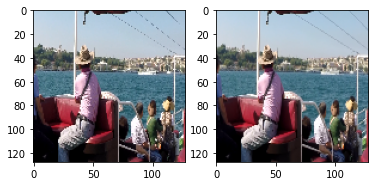

In [9]:
# view a random pair
r = random.randint(0, len(clean_frames)-1)
print(r)
fig = plt.figure()
fig.subplots_adjust(hspace=0.1, wspace=0.2)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(clean_frames[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(blurry_frames[r])

In [10]:
# Next we can initialize a few parameters in order to use them when we code our model. 

# Network Parameters
input_shape = (128, 128, 3)
batch_size = 32
kernel_size = 3
latent_dim = 256

# Encoder/Decoder number of CNN layers and filters per layer
layer_filters = [64, 128, 256]

In [11]:
inputs = Input(shape = input_shape, name = 'encoder_input')
x = inputs

In [12]:
5# We will be building a stack of Conv2D(64) - Conv2D(128) - Conv2D(256).
# input shape (128, 128, 3) and kernel size equal to 3 and the Encoder will compress this shape to (16, 16, 256) and will further flatten this into a one dimensional array which will be the input for our Decoder.


for filters in layer_filters:
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=2,
               activation='relu',
               padding='same')(x)
shape = K.int_shape(x)    #K.int_shape() here helps in converting a tensor into a tuple of integers.
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

In [13]:
# instantiate encoder model

encoder = Model(inputs, latent, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 latent_vector (Dense)       (None, 256)               16777472  
                                                                 
Total params: 17,148,288
Trainable params: 17,148,288
Non-t

In [14]:
# building decoder

#will be similar to the encoder model but it will be doing the reverse or opposite computations. We will first manually convert the one dimensional array from the encoder model to the shape (16, 16, 256) and then send it to the decoder to decode it back to (128, 128, 3) shape
# So the stack here will be Conv2DTranspose(256) - Conv2DTranspose(128) - Conv2DTranspose(64).

latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(shape[1]*shape[2]*shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)
for filters in layer_filters[::-1]:
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        strides=2,
                        activation='relu',
                        padding='same')(x)

outputs = Conv2DTranspose(filters=3,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same',
                          name='decoder_output')(x)

In [15]:
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 256)]             0         
                                                                 
 dense (Dense)               (None, 65536)             16842752  
                                                                 
 reshape (Reshape)           (None, 16, 16, 256)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 32, 32, 256)      590080    
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 64, 64, 128)      295040    
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 128, 128, 64)     7379

In [16]:
# building autoencoder model

autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 128, 128, 3)]     0         
                                                                 
 encoder (Functional)        (None, 256)               17148288  
                                                                 
 decoder (Functional)        (None, 128, 128, 3)       17803395  
                                                                 
Total params: 34,951,683
Trainable params: 34,951,683
Non-trainable params: 0
_________________________________________________________________


In [17]:
# choose hyperparams and compile model

#autoencoder.compile(loss='mse', optimizer='adam',metrics=["acc"])
autoencoder.compile(loss='bce', optimizer='adam',metrics=["acc"])

In [18]:
# define learning rate reducer: reduce learning rate if no improvement in metric

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               verbose=1,
                               min_lr=0.5e-6)
# call on every epoch
callbacks = [lr_reducer]

In [19]:
# train the model

history = autoencoder.fit(blurry_frames,
                      clean_frames,
                      validation_data=(blurry_frames, clean_frames),
                      epochs=200,
                      batch_size=batch_size,
                      callbacks=callbacks)

Epoch 1/200
15/15 [==============================] - 17s 204ms/step - loss: 0.6906 - acc: 0.4349 - val_loss: 0.6844 - val_acc: 0.4913 - lr: 0.0010
Epoch 2/200
15/15 [==============================] - 2s 133ms/step - loss: 0.6656 - acc: 0.4291 - val_loss: 0.6494 - val_acc: 0.5171 - lr: 0.0010
Epoch 3/200
15/15 [==============================] - 2s 131ms/step - loss: 0.6373 - acc: 0.5164 - val_loss: 0.6277 - val_acc: 0.5162 - lr: 0.0010
Epoch 4/200
15/15 [==============================] - 2s 132ms/step - loss: 0.6233 - acc: 0.5155 - val_loss: 0.6182 - val_acc: 0.5124 - lr: 0.0010
Epoch 5/200
15/15 [==============================] - 2s 133ms/step - loss: 0.6152 - acc: 0.5276 - val_loss: 0.6104 - val_acc: 0.5391 - lr: 0.0010
Epoch 6/200
15/15 [==============================] - 2s 133ms/step - loss: 0.6075 - acc: 0.5403 - val_loss: 0.6033 - val_acc: 0.5488 - lr: 0.0010
Epoch 7/200
15/15 [==============================] - 2s 134ms/step - loss: 0.6009 - acc: 0.5577 - val_loss: 0.5971 - val_ac


       Input                        Ground Truth                  Predicted Value


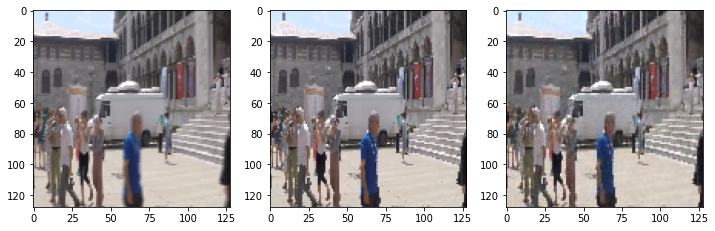

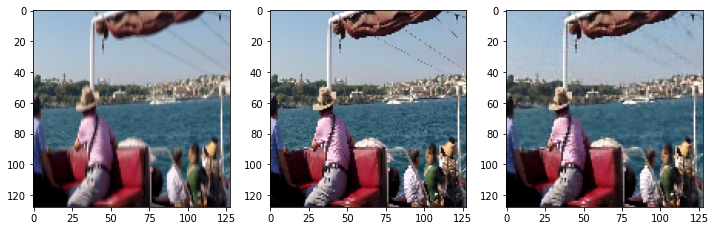

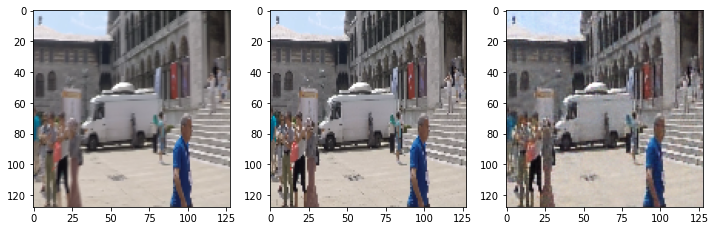

In [20]:
# final result

print("\n       Input                        Ground Truth                  Predicted Value")
for i in range(3):
    
    r = random.randint(0, len(clean_frames)-1)

    x, y = blurry_frames[r],clean_frames[r]
    x_inp=x.reshape(1,128,128,3)
    result = autoencoder.predict(x_inp)
    result = result.reshape(128,128,3)

    fig = plt.figure(figsize=(12,10))
    fig.subplots_adjust(hspace=0.1, wspace=0.2)

    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(x)

    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(y)

    ax = fig.add_subplot(1, 3, 3)
    plt.imshow(result)

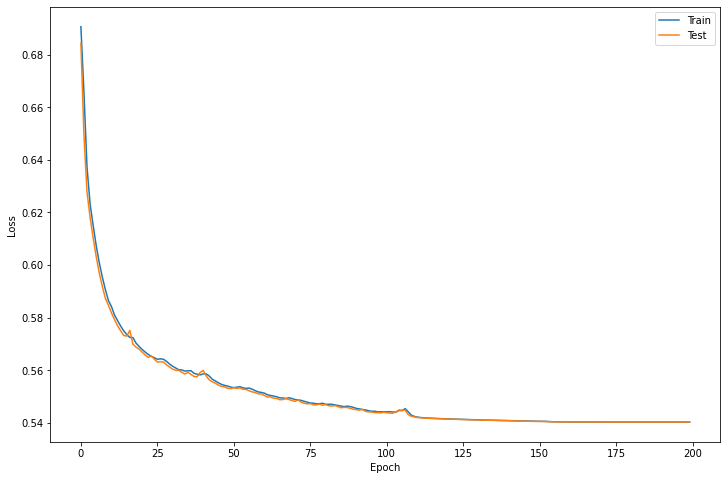

In [21]:
# plot of loss function vs epoch

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(0, 201, 25))
plt.show()

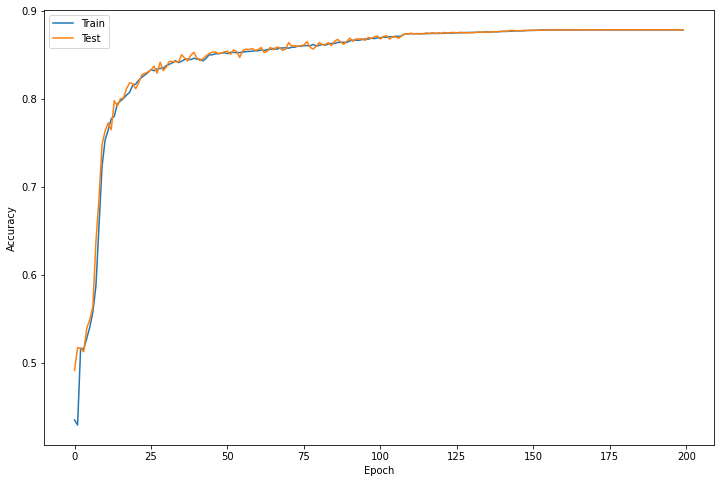

In [22]:
# accuracy vs epoch

plt.figure(figsize=(12,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Test'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 201, 25))
plt.show()